In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
batch_size = 32
img_height = 150
img_width = 150

In [3]:
train_folder="C:\\Users\emil\\Desktop\\week10 day2 hw\\seg_train\\seg_train"
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [4]:
valid_folder= "C:\\Users\\emil\\Desktop\\week10 day2 hw\\seg_test\\seg_test"
val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_folder,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [5]:

label_to_class_name = dict(zip(range(len(train_ds.class_names)), train_ds.class_names))
label_to_class_name

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

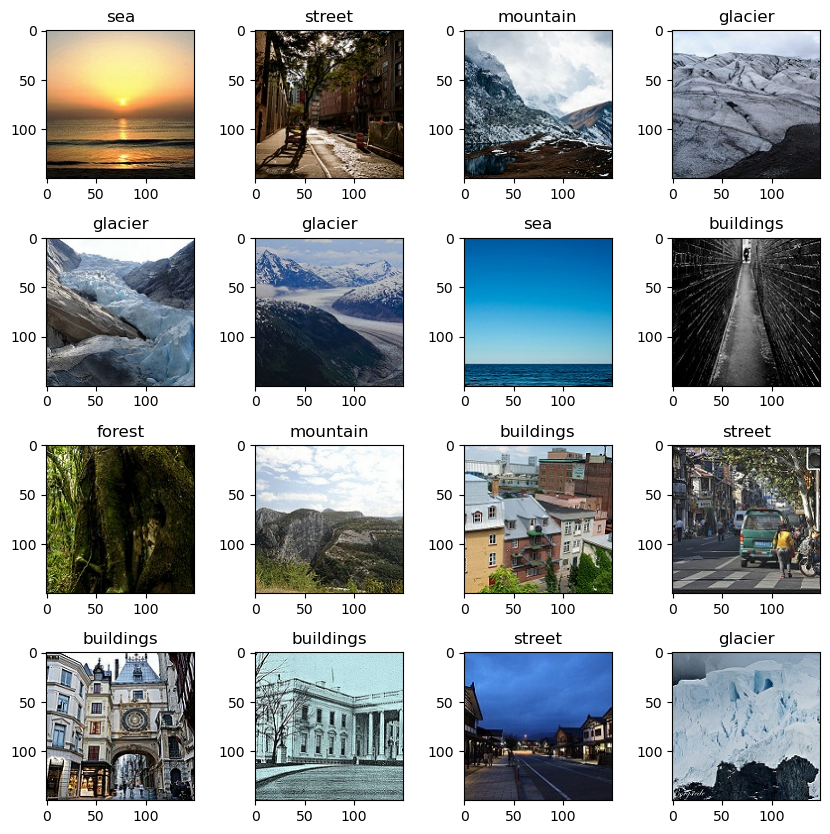

In [6]:
data_iterator = train_ds.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):  
    for j in range(4):  
        index = i * 4 + j  
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()    

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [8]:
train_ds=train_ds.map(lambda x,y:(x/255,y))
val_ds=val_ds.map(lambda x,y:(x/255,y))

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [13]:
epochs=15
history1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
439/439 [==============================] - 113s 255ms/step - loss: 0.8942 - accuracy: 0.6590 - val_loss: 0.6912 - val_accuracy: 0.7433
Epoch 2/15
439/439 [==============================] - 96s 220ms/step - loss: 0.5749 - accuracy: 0.7949 - val_loss: 0.7024 - val_accuracy: 0.7403
Epoch 3/15
439/439 [==============================] - 94s 213ms/step - loss: 0.3756 - accuracy: 0.8660 - val_loss: 0.8949 - val_accuracy: 0.7153
Epoch 4/15
439/439 [==============================] - 96s 219ms/step - loss: 0.2436 - accuracy: 0.9146 - val_loss: 0.9801 - val_accuracy: 0.7430
Epoch 5/15
439/439 [==============================] - 101s 229ms/step - loss: 0.1662 - accuracy: 0.9441 - val_loss: 1.0339 - val_accuracy: 0.7623
Epoch 6/15
439/439 [==============================] - 91s 208ms/step - loss: 0.0986 - accuracy: 0.9694 - val_loss: 1.0109 - val_accuracy: 0.7730
Epoch 7/15
439/439 [==============================] - 90s 205ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 1.1649 - val_

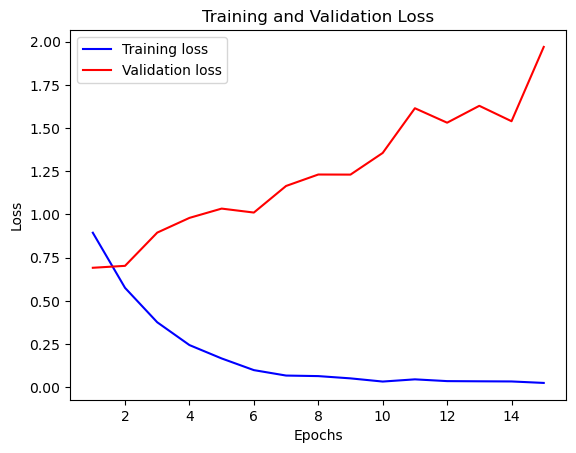

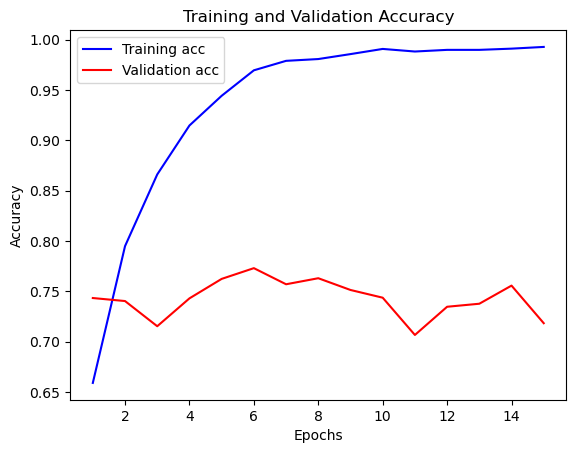

In [14]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()